In [32]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt

In [24]:
clothingFile = pd.read_table('Clothing_Store',sep=',')
clothingFile.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,...,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,...,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,...,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,...,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,9955600078517,1107,49,1,87.44,0,87.44,11,0.20,0.20,...,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [25]:
#Create a dataframe of just people who responded
responded = clothingFile[clothingFile['RESP'] == 1]
responded.shape

(3611, 51)

In [26]:
#Create a dataframe of just people who did not respond to the promotion
norespond = clothingFile[clothingFile['RESP'] == 0]
norespond.shape

(18129, 51)

## Test to Determine Whether There is a Significant Relationship Between Two Variables.

Generally the z-statistic is used if the sample size is over 30 and you know the population standard deviation. The t-statistic is used if you do not know the population standard deviation and the sample size is less than 30.

While our sample size is over 30, we do not know the standard deviation for the population, so I will use the t-statistic. I will use a two-sample t-test because we are looking at a categorical variable with the Responsive and Non-Responsive groups.

**Null hypothesis** = Customers who did not respond to the promotion have the same number of purchase visits as customers who responded to the promotion.

**Alternative hypothesis** = Customers who did not respond to the promotion do not have the same number of purchase visits as customers who responded to the promition.

In [27]:
print('Mean Frequency of Purchase Visits of Responsive Customers:',np.mean(responded['FRE']))
print('Mean Frequency of Purchase Visits of Non-Responsive Customers:',np.mean(norespond['FRE']))
(np.mean(responded['FRE'])-np.mean(norespond['FRE']))

('Mean Frequency of Purchase Visits of Responsive Customers:', 10.92772085294932)
('Mean Frequency of Purchase Visits of Non-Responsive Customers:', 3.8962987478625406)


7.03142210508678

In [29]:
#2-sample t-test for Frequency of Purchase Visits
statistic,p = stats.ttest_ind(responded['FRE'],norespond['FRE'],equal_var=False)
print('Statistic:',statistic)
print('p-value:',p)

('Statistic:', 38.366556006525101)
('p-value:', 8.2607310855134972e-273)


Customers who responded to the promotion have an average of 10.92 purchase visits, while customers who did not respond to the promotion have an average of 3.90 purchase visits. The p-value is very low (8.26 x 10-273) so we reject the null hypothesis (that the Responsive and Non-Responsive customers have the same number of purchase visits). Therefore the difference we observe between the frequency of visits in the Responsive and Non-Responsive groups is statistically significant.

Frequent customers love to get great deals on products they trust and enjoy. Promotions may be a good way to keep them coming in and keep the product at the front of their mind. While customers who frequent the store less did not respond to the promotion as much, we also don't necessarily want to stop targeting them. If we can get them to respond to the promotions, they may be converted to a more frequent customer. We would most-likely want to focus on the customers who in the middle range of visits - between 3 and 10 visits.

## Correlation

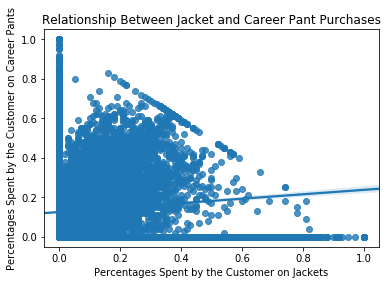

In [40]:
import seaborn as sns
sns.regplot(y="PJACKETS", x="PCAR_PNTS", data=clothingFile, fit_reg = True)
plt.xlabel("Percentages Spent by the Customer on Jackets")
plt.ylabel("Percentages Spent by the Customer on Career Pants")
plt.title("Relationship Between Jacket and Career Pant Purchases")
plt.show()

The percent of purchases of Jackets and Career Pants seem to be correlated. As people have a higher percentage of Jacket purchases, they also have a higher percentage of Career Pant purchases. We will test the correlation to determine if there is a statistically significant correlation between the two.

### Hypothesis Test

Null hypothesis: There is no correlation between the purchase of Jackets and the purchase of Career Pants.

Alternative hypothesis: There is a correlation between the purchase of Jackets and the purchase of Career Pants.

In [39]:
cor_co, p = stats.pearsonr(clothingFile['PJACKETS'],clothingFile['PCAR_PNTS'])
print('Correlation Coefficient', cor_co)
print('p-value', p)

('Correlation Coefficient', 0.085827724725047738)
('p-value', 7.8774844158546513e-37)


The very small p-value (7.877 e-37) leads us to reject the null hypothesis that there is no correlation between the purchase of Jackets and the purchase of Career Pants. The p-value tells us there is a very small chance the results are random. There is a statistically significant relationship between the percent of purchases a customer has of Jackets and their percent of purchases of Career Pants. As customers spend more on Jackets, they spend slightly more on Career Pants as well.